<h1><center> PPOL564 | DS1: Foundations </center><h1>
<h3><center> Lecture 22 <br><br><font color='grey'> 
Constained Optimization with Equality Constraints </font></center></h3>

In [1]:
import numpy as np
import numpy.linalg as la
from sympy import *
import matplotlib.pyplot as plt
init_printing(use_latex=True)

# Constrained Optimization

## Equality Constraint

The goal is to optimize given some constraints. Constraints can take many forms (time, money, resources, etc.) and set realistic bounds on optimization problems. 

By way of example, let's say that our objective function was


<br>
<br>

$$ f(x,y) = y^2 + x^2 + xy $$

<br>
<br>

Our constraint: $x$ and $y$ must equal $4$.

<br>
<br>

$$ x + y = 4 $$

<br>
<br>

That is, we aim to find the maximum value for $f(x,y)$ given that the values that $x$ and $y$ can take on are constrained. This type of constraint is known as an **equality constraint**

We can rewrite our constraint as a function.

<br>
<br>

$$ g(x,y) = x + y - 4 $$

<br>
<br>

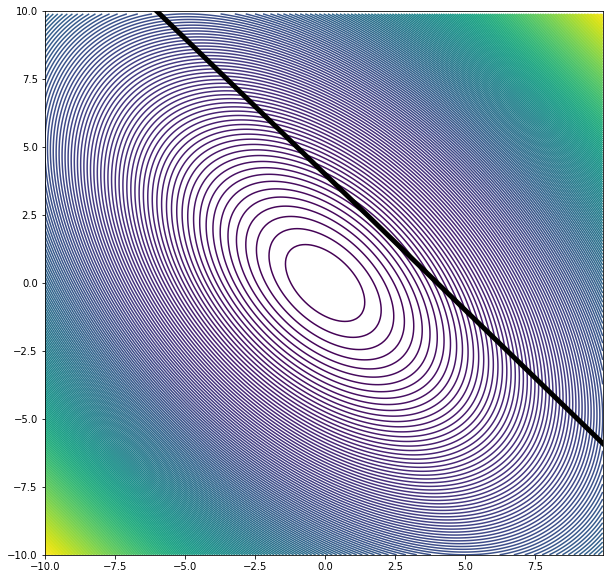

In [2]:
def f(x,y):
    return y**2 + x**2 + x*y

def g(y):
    # The constraint x + y = 4 in terms of x
    return 4-y

# Plot the 3D output w/ constraint as a contour plot
x = np.arange(-10,10, .1)
y = np.arange(-10,10, .1)
X, Y = np.meshgrid(x,y)
fig1, ax1 = plt.subplots(figsize=(10,10))
C = plt.contour(X,Y,f(X,Y),200)
C = plt.plot(x, g(y), 'k', linewidth=5,c="black")
C = plt.ylim(-10,10)

---

### The Lagrangian

How do we incorporate our constraint when optimizing? We make a new, composit function called the **lagrangian** where we include our constrains and the original (unconstrained) objective  function. 

<br>
<br>

$$\mathcal{L}(x,y,\lambda) = f(x,y) - \lambda g(x,y)$$

<br>
<br>

$\lambda$ is the lagrange multiplier. It's a proportionality constant for the gradients. Specifically, the Lagrange multiplier tells us the rate at which increases/decreases in the constraint parameter increases/decreases whatever we're trying to maximize/minimize. _It is the constraint's marginal cost_. (See the supplementary notebook). 

<br>
<br>

To _generalize to more than one constraint_, the lagrangian looks as follows:

<br>
<br>

$$ \mathcal{L}(x,y,\lambda) = f(x,y) - \sum_i \lambda_i g_i(x,y,c_i) $$

<br>
<br>

where $c_i$ is the constant that the constraint is set to for each function $g_i(\cdot)$

<br>
<br>

Let's apply the lagrange function to solve the constrained optimization problem outlined above.

<br>
<br>

$$\mathcal{L}(x,y,\lambda) = y^2 + x^2 + xy - \lambda(x+y-4) $$

<br>
<br>

#### (1) Calculate the gradient

<br>
<br>

$$\nabla \mathcal{L}(x,y,\lambda) = \begin{pmatrix} 2x + y - \lambda \\ 2y + x - \lambda \\ -x - y + 4 \end{pmatrix}$$

<br>
<br>

Note that the last entry is really just our constraint condition. 

#### (2) Set the gradient to the zero vector to calculate the stationary points.

<br>
<br>

$$ \nabla \mathcal{L}(x,y,\lambda) = \textbf{0} $$

<br>
<br>

$$ 2x + y - \lambda = 0 \\ 2y + x - \lambda = 0 \\ x + y = 4 $$

<br>
<br>

When we solve this, we find the following stationary points. As we can see below, one set of critical values emerge. 

In [3]:
x,y,l = symbols('x y l')
L = y**2 + x**2 + x*y - l*(x+y-4)
L_gradient = [L.diff(x),L.diff(y),L.diff(l)] # Calculate the gradient
display(L_gradient)
solve(L_gradient,[x,y,l]) # Solve for 0

Let's evaluate the function $f(x,y)$ at these stationary points (note that $f(x,y)$ doesn't take $\lambda$ as an input, so we exclude it...)

In [4]:
f_sym = y**2 + x**2 + x*y
display(f_sym.evalf(subs={x:2,y:2}))

#### (3) Determine if the stationary points are maxima or minima.

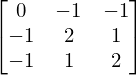

In [5]:
# First let's calculate the Hessian 
Border_Hessian = hessian(L,[l,x,y]) # Border Hessian
Border_Hessian

The matrix Hessian matrix of the Lagrangian function is called a "**Border Hessian**". In the lower right hand corner, we can see the original Hessian. The remaining parts correspond with the constraints. 

The constraints are going to give us a bit of trouble calculating the local curvature of the lagrange function (as a result, taking the eigen values isn't going to be enough to classify the convexity of any given stationary point).

Rather, to determine if the stationary point is a maximum or minimum, we need to calculate the determinant of the **leading principal minors** of the matrix to see if the matrix is positively or negatively defined. 

<div class="alert alert-warning">

### Sidenote: Using leading principle minors to determine if a matrix is positive/negative definite

First, let's discuss what a principal minor is. Consider the following matrix

<br>
<br>

$$ \textbf{A} = \begin{pmatrix} 3 & 0 & 3\\ 0 & 1 & -2 \\3 & -2 & 8\end{pmatrix} $$

<br>
<br>

Calculating the principle minors works as follows:

<br>
<br>

$$ D_1 = 3$$

<br>
<br>

$$ D_2 = \begin{pmatrix} 3 & 0 \\ 0 & 1\end{pmatrix} \;\;\; |D_2| = 3 $$


<br>
<br>


$$ D_3 = \begin{pmatrix} 3 & 0 & 3 \\ 0 & 1 & -2 \\ 3 & -2 & 8 \end{pmatrix} \;\;\; |D_3| = 3 $$


<br>
<br>


In essence, we take ever larger submatrices and calculate the determinant for each. What we are looking for are specific patterns to determine if the matrix is



- **Positive definite**: $D_1 > 0, D_2 > 0, D_3 > 0$

- **Negative definite**: $D_1 < 0, D_2 > 0, D_3 < 0$

- **Positive semidefinite**: $D_1 \ge 0, D_2 \ge 0, D_3 \ge 0$ for all principal minors

- **Negative semidefinite**: $D_1 \le 0, D_2 \ge 0,D_3 \le 0$ for all principal minors



So our example matrix $\textbf{A}$ is positive definite because all its principal minors are positive.

</div>

Recall we care to know if the Hessian is positively or negatively defined because it tells us if we have a minima (positive definite) or a maxima (negative definite) at the critical value. But, as noted, in the case of the Border Hessian, the constraints can cause problems when classifying the matrix as positive or negative definite, so we have can't just compute the eigenvalues as we did before. 

What's important is that we don't need to calculate the first few principal minors, rather _we only need to calculate the last few (highest order) principal minors_.

To determine how many leading principle minors we have to calculate, we have to ask:

- How many constraints do we have? Let's call this $n$
- How many variables do we have? Let's call this $m$

$ m - n = $ the order of principal minors we need to calculate from largest (from $|B|$ to the largest principal minor backwards)/

If the last $ m - n $ leading principal minors all have the sign $(-1)^n$, then the border Hessian is **positive definite (Minimum)**. If the determinant of the bordered Hessian has $(-1)^m$ and the rest of the last $m-n$ leading principal minors alternate in sign, then the bordered Hessian is **negative definite (Maximum)**. Otherwise the test is indeterminant (Saddle Point).

So does a maxima/minima exist? Let's calculate the determinant of the border Hessian at the stationary points.

In [6]:
# vars - constraints = 1 (so we only need to calculate the determinant)
m = 2; n = 1; print(m-n)

# Calculate the border Hessian evaluated at one of the critical points
BH = np.mat(Border_Hessian,dtype='float') 

# calculate the determinant of the Border Hessian. 
print(la.det(BH).round(3)) 

# Negative definite -> local maximum.
print(sign(la.det(BH)) == (-1)**m) 

# Positive definite -> local minima.
print(sign(la.det(BH)) == (-1)**n) 

1
-2.0
False
True


In [7]:
f_sym.evalf(subs={x:2,y:2})

The stationary points $x^* = 2$ and $y^*=2$  is a global minima. $f(x^*, y^*) = 12$

#### Plot minimum and maximum values given the constraint

This is our maxima and minima of our function $f(x,y)$ given the equality constraint $x + y = 4$

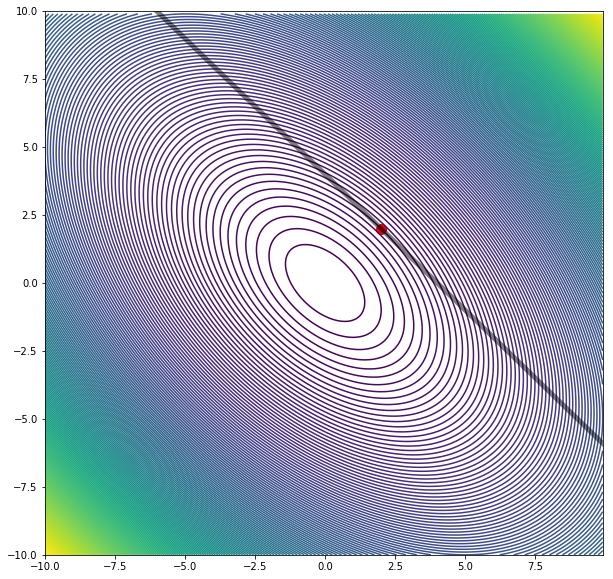

In [8]:
# Plot the 3D output w/ constraint as a contour plot
x = np.arange(-10,10, .1)
y = np.arange(-10,10, .1)
X, Y = np.meshgrid(x,y)
fig1, ax1 = plt.subplots(figsize=(10,10))
C = plt.contour(X,Y,f(X,Y),200)
C = plt.ylim(-10,10)
C = plt.plot(x, g(y), 'k', linewidth=5,c="black",alpha=.5)
C = plt.scatter([2], [2],color="red",s=100) # Minimum